<a href="https://colab.research.google.com/github/rattakan06/229351-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [ ]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:00:18--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:00:18 (41.4 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
data['value']# .loc is .location

,value
time,
1996-01-01,79.35
1996-02-01,75.78
1996-03-01,86.32
1996-04-01,72.60
1996-05-01,74.86
...,...
2011-11-01,93.37
2011-12-01,98.34
2012-01-01,86.44


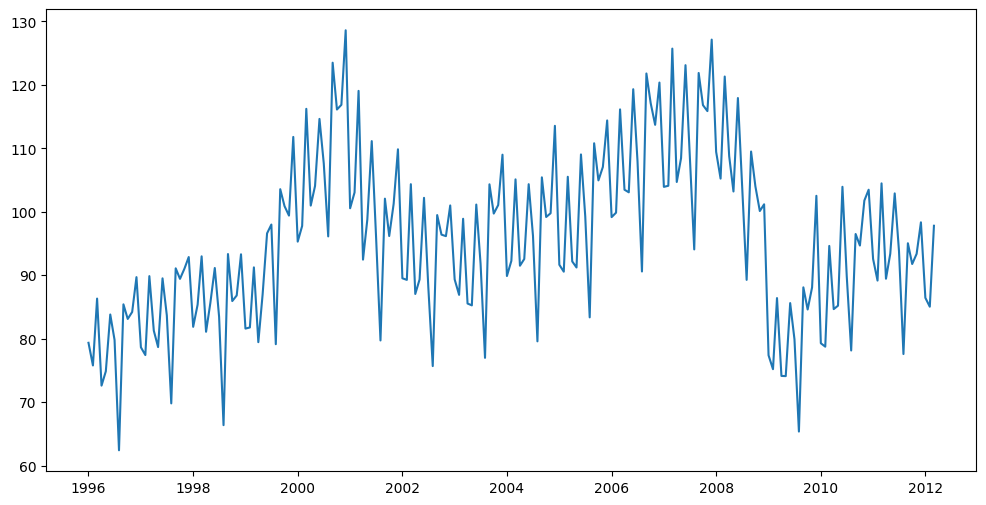

In [ ]:
plt.figure(figsize=(12,6)) #size
plt.plot(data['value']);

In [ ]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
# Add or change values

data.loc['1996-01-01','2009-12-01'] = 86

data

,Unnamed: 0,value,2009-12-01
time,,,
1996-01-01,1,79.35,86.0
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
...,...,...,...
2011-11-01,191,93.37,NaN
2011-12-01,192,98.34,NaN
2012-01-01,193,86.44,NaN


# Moving average

In [ ]:
data['MA'] = data['value'].rolling(window=5,center=True).mean() #วิ่ง 5 ตัว เรื่อยๆ และตั้งเซนเตอร์ = True .mean()เปลี่ยนเป็นตัวอื่นได้แต่งานนี้ใช้ เฉลี่ย

data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1) # 2

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


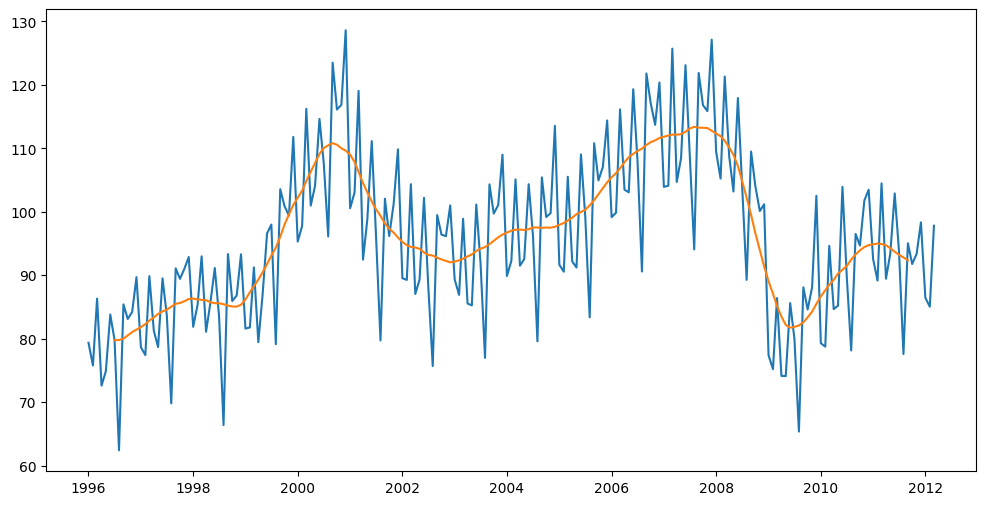

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

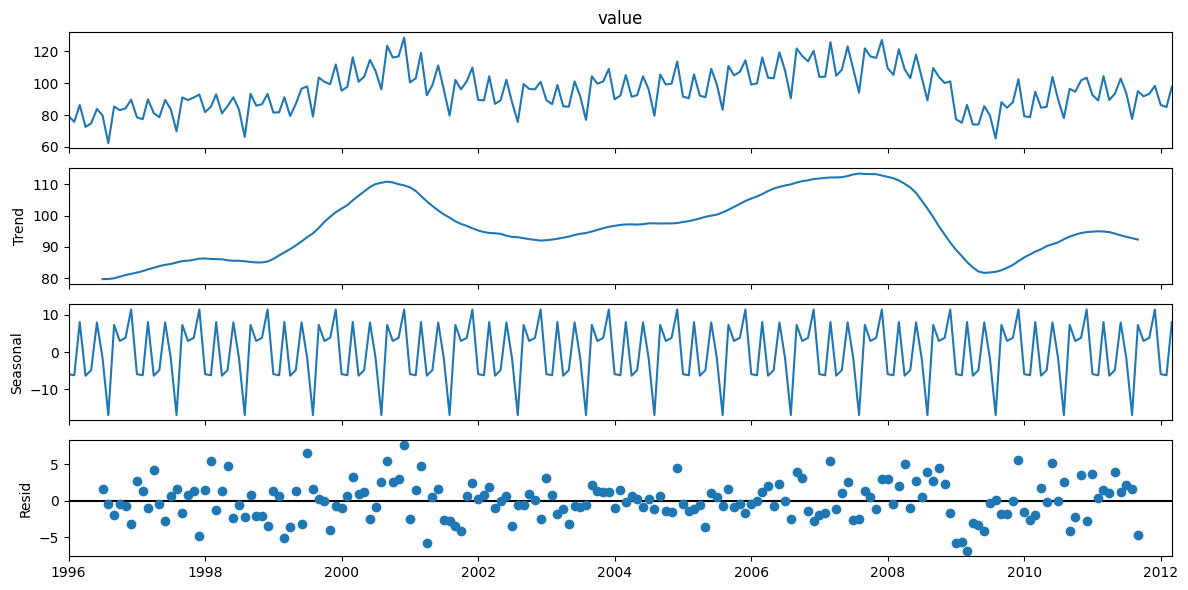

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #tsa = time series analisze
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period= 12)

result_add.plot();

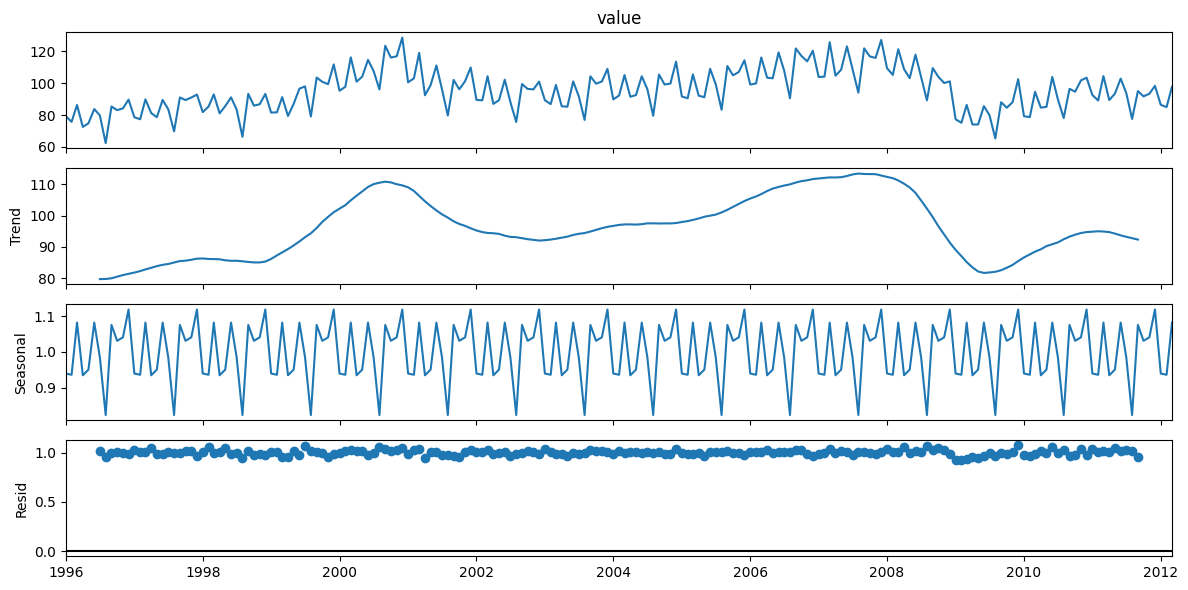

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887662
1996-02-01    -6.199273
1996-03-01     8.083171
1996-04-01    -6.314968
1996-05-01    -4.818468
                ...    
2011-11-01     3.847366
2011-12-01    11.447504
2012-01-01    -5.887662
2012-02-01    -6.199273
2012-03-01     8.083171
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97

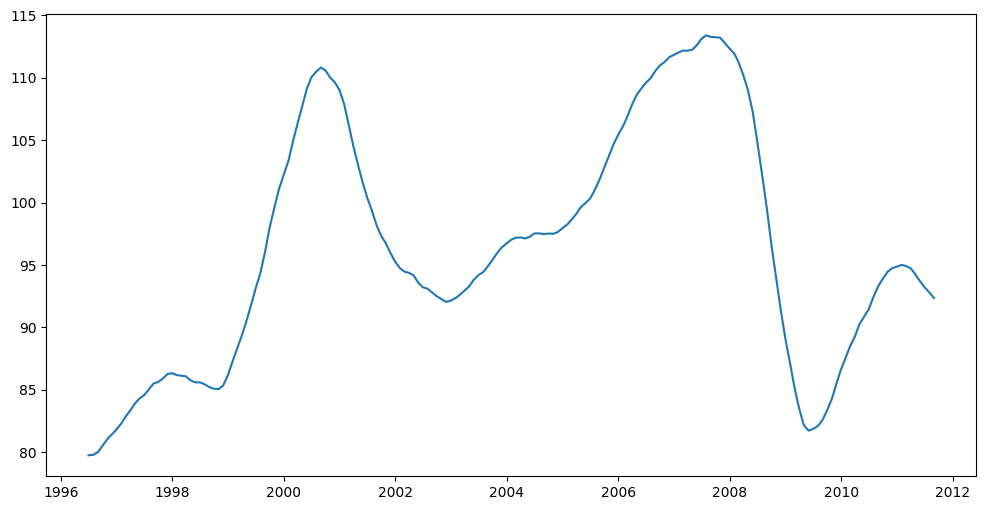

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)
plt.plot(result_add.trend)

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [ ]:
!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:31:34--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:31:34 (45.1 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [ ]:
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [ ]:
train_set= data.loc['1996-01-01':'2009-12-01']
test_set= data.loc['2010-01-01':'2012-03-01']

In [ ]:
train_set['MA']= train_set['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)
test_set['MA']= test_set['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

/tmp/ipython-input-51947120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['MA']= train_set['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)
/tmp/ipython-input-51947120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['MA']= test_set['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)


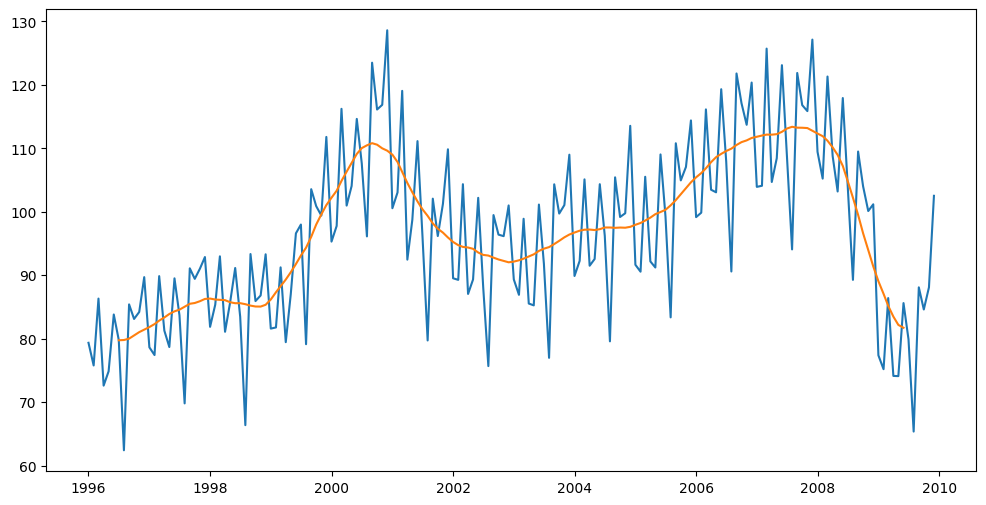

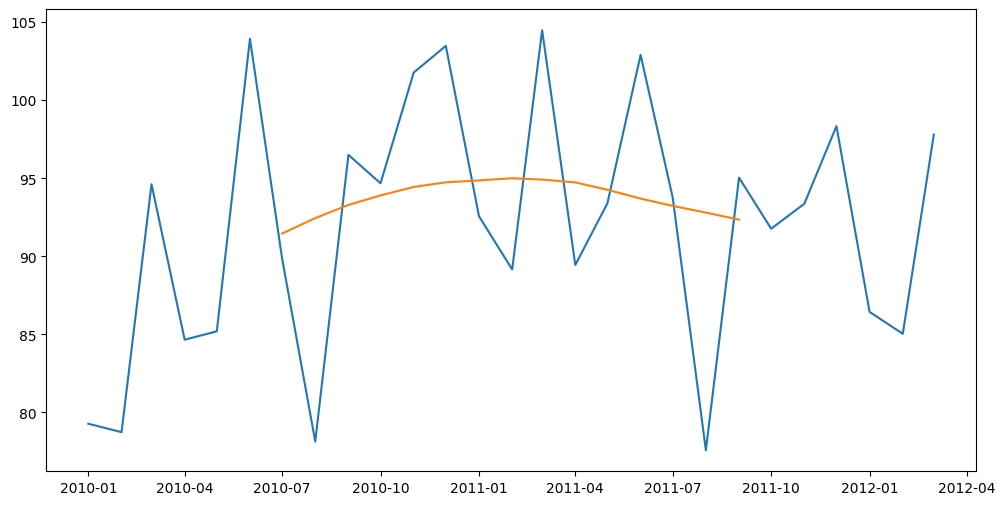

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_set['value'])
plt.plot(train_set['MA']);

plt.figure(figsize=(12,6))
plt.plot(test_set['value'])
plt.plot(test_set['MA']);

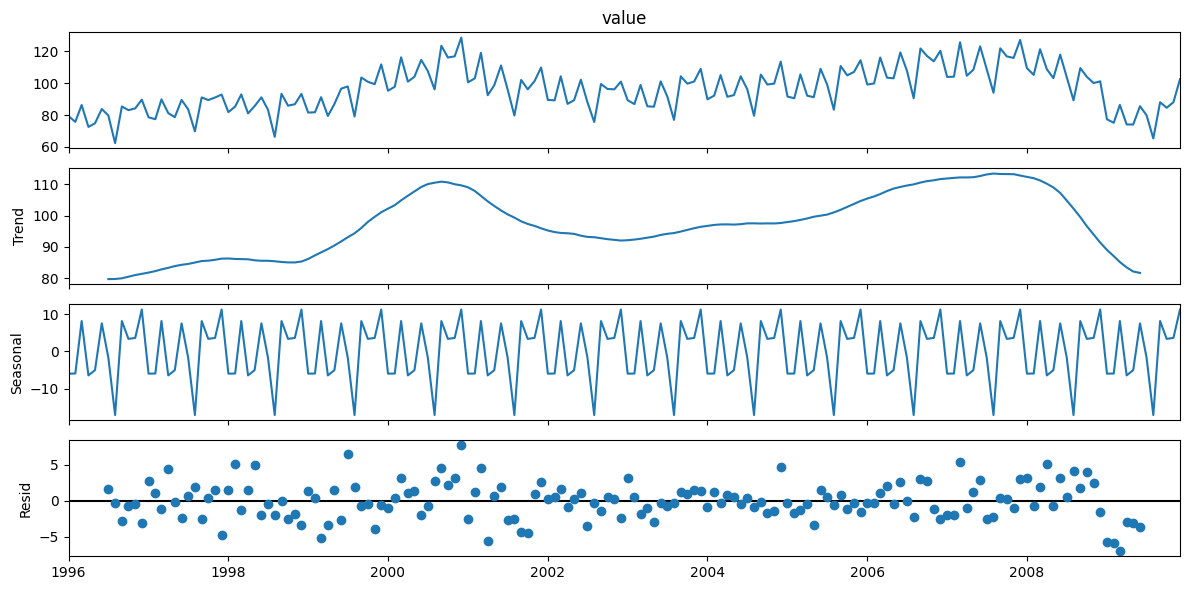

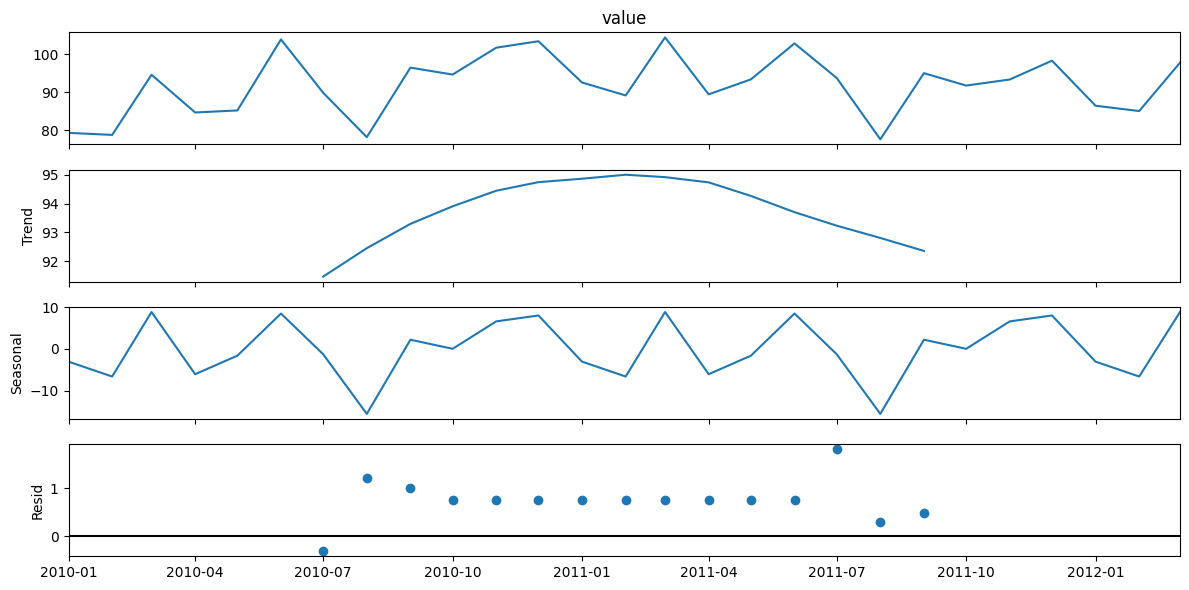

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #tsa = time series analisze
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add_train = seasonal_decompose(train_set['value'], model='additive', period= 12)
result_add_test = seasonal_decompose(test_set['value'], model='additive', period= 12)

result_add_train.plot()
result_add_test.plot();

In [ ]:
def rmse(y_true,y_pred):
  #Inputs
  #y_true: actual value, y_pred: predicted values
  #Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [ ]:
TR_last = result_add_train.trend.loc['2009-06-01'] + result_add_train.resid.loc['2009-06-01']
print(TR_last)

78.05701121794871


In [ ]:
S_train = result_add_train.seasonal
seasonal_template = S_train.groupby(S_train.index.month).mean()
seasonal_template

,seasonal
time,
1,-5.985857
2,-5.957941
3,8.183245
4,-6.462428
5,-5.041178
6,7.552989
7,-1.640954
8,-17.138902
9,8.178886


In [ ]:
predict_test = test_set['value'] - test_set['value']
predict_test

,value
time,
2010-01-01,0.0
2010-02-01,0.0
2010-03-01,0.0
2010-04-01,0.0
2010-05-01,0.0
2010-06-01,0.0
2010-07-01,0.0
2010-08-01,0.0
2010-09-01,0.0


In [ ]:
predict_test_ = predict_test + TR_last
for i in predict_test_.index:
  predict_test_.loc[i] = predict_test_.loc[i] + seasonal_template.loc[i.month]
predict_test_


,value
time,
2010-01-01,72.071154
2010-02-01,72.099071
2010-03-01,86.240256
2010-04-01,71.594583
2010-05-01,73.015833
2010-06-01,85.610000
2010-07-01,76.416058
2010-08-01,60.918109
2010-09-01,86.235897


In [ ]:
test_set['value']

,value
time,
2010-01-01,79.28
2010-02-01,78.74
2010-03-01,94.62
2010-04-01,84.66
2010-05-01,85.20
2010-06-01,103.94
2010-07-01,89.87
2010-08-01,78.14
2010-09-01,96.50


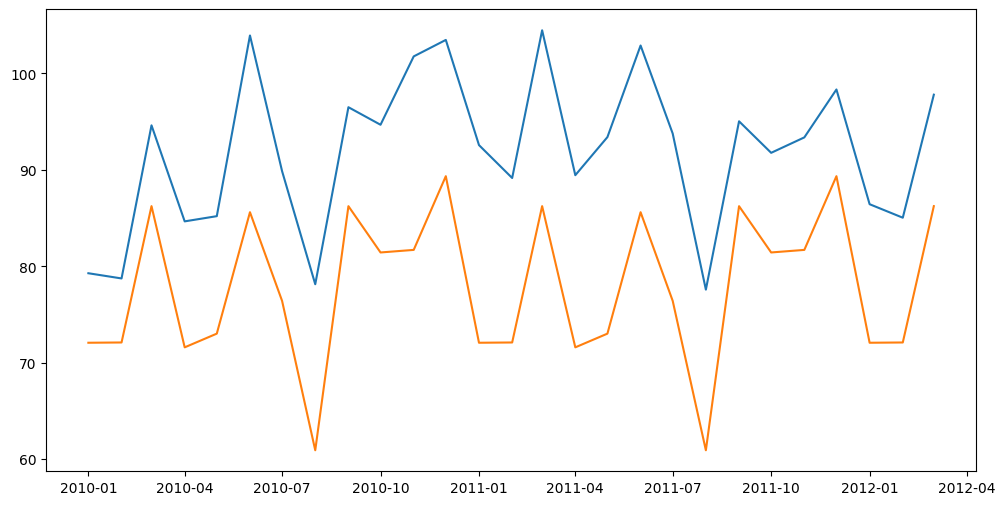

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_set['value'])
plt.plot(predict_test_);

In [ ]:
Rmse = rmse(test_set['value'],predict_test_)
print(Rmse)

14.589766942508222


ค่า Rmse เยอะ แปลว่าคลาดเคลื่อนเยอะ เนื่องจากใช้ค่าสุดท้ายของ training set ซึ่งถูกล็อกค่าไว้(อาจไม่ตรงตามแนวโน้มจริงหรือไม่ก็ได้) มาบวกกับฤดูการแต่ละเดือนไปครบ ดังนั้นการที่ไม่ได้ใช้แนวโน้มจริงมาทำนายเลยอาจคลาดเคลื่อนเยอะ

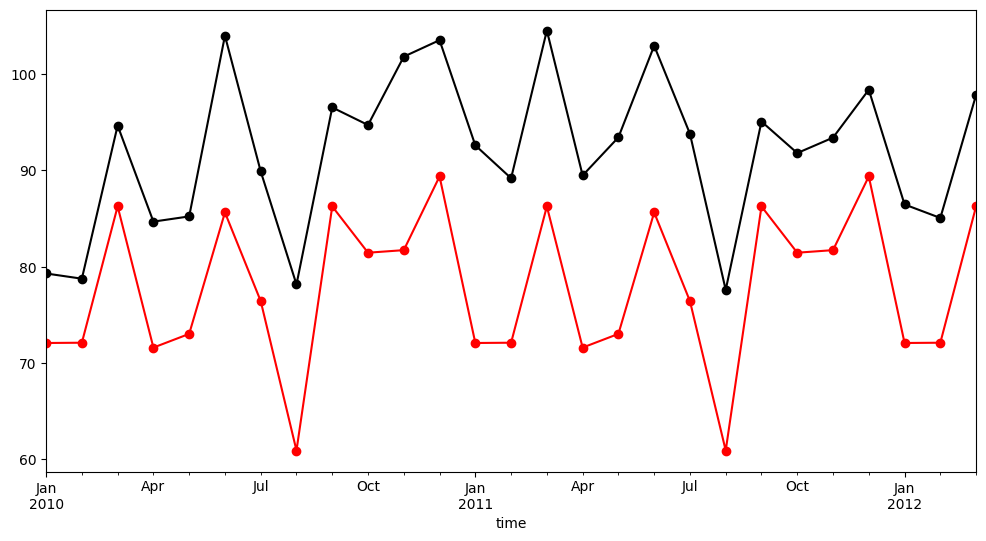

In [ ]:
ax = test_set['value'].plot(marker='o', color='black', figsize=(12,6))
bx = predict_test_.plot(color='red', marker='o')